In [1]:
# Load Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# Load Datasets
fraud_df = pd.read_csv('../data/Fraud_Data.csv')
ip_df = pd.read_csv('../data/IpAddress_to_Country.csv')
credit_df = pd.read_csv('../data/creditcard.csv')


In [4]:
# Show first 5 rows
fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [ ]:
fraud_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [6]:
#check for duplicated values
fraud_df.duplicated().sum()

np.int64(0)

In [8]:
#check missing values
fraud_df.isnull().sum()



user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [9]:
# Convert time
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])


In [10]:
#credit card Data
credit_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
# check for duplicated values
credit_df.duplicated().sum()

np.int64(1081)

In [12]:
#drop duplicated values
credit_df = credit_df.drop_duplicates()

In [13]:
#ensure duplicated values are dropped
credit_df.duplicated().sum()

np.int64(0)

In [14]:
#check for missing values
credit_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
#ip_address Data
ip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [16]:
#check for null values
ip_df.isnull().sum()

lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64

In [17]:
#check for null values
ip_df.duplicated().sum()

np.int64(0)

In [ ]:
#Add Time Features
fraud_df['hour_of_day'] = fraud_df['purchase_time'].dt.hour
fraud_df['day_of_week'] = fraud_df['purchase_time'].dt.dayofweek
fraud_df['time_since_signup'] = (fraud_df['purchase_time'] - fraud_df['signup_time']).dt.total_seconds()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   user_id            151112 non-null  int64         
 1   signup_time        151112 non-null  datetime64[ns]
 2   purchase_time      151112 non-null  datetime64[ns]
 3   purchase_value     151112 non-null  int64         
 4   device_id          151112 non-null  object        
 5   source             151112 non-null  object        
 6   browser            151112 non-null  object        
 7   sex                151112 non-null  object        
 8   age                151112 non-null  int64         
 9   ip_address         151112 non-null  float64       
 10  class              151112 non-null  int64         
 11  hour_of_day        151112 non-null  int32         
 12  day_of_week        151112 non-null  int32         
 13  time_since_signup  151112 non-null  float64 

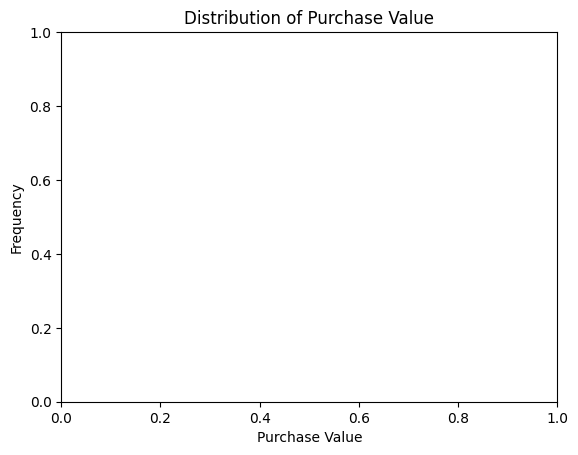

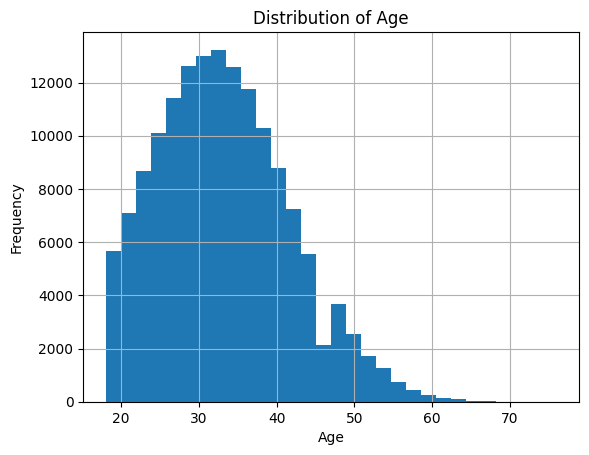

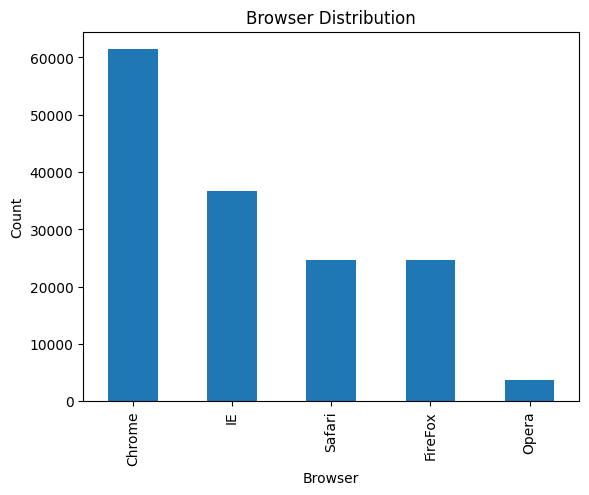

In [23]:
#step 3: EDA
#univariate analysis for fraud_df
fraud_df['purchase_value'].hist
plt.title('Distribution of Purchase Value')
plt.xlabel('Purchase Value')
plt.ylabel('Frequency')
plt.show()

fraud_df['age'].hist(bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#for categorical features
fraud_df['browser'].value_counts().plot(kind='bar')
plt.title('Browser Distribution')
plt.xlabel('Browser')
plt.ylabel('Count')
plt.show()

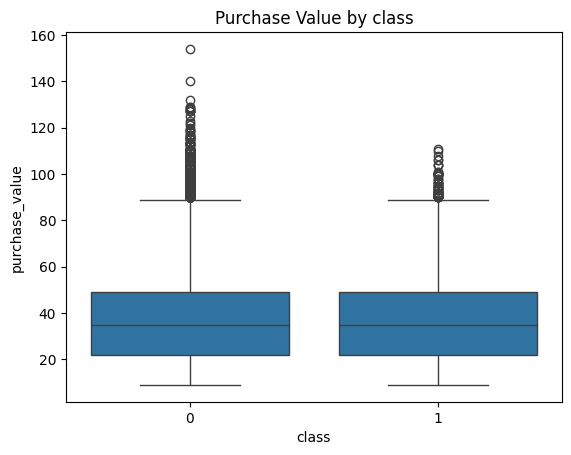

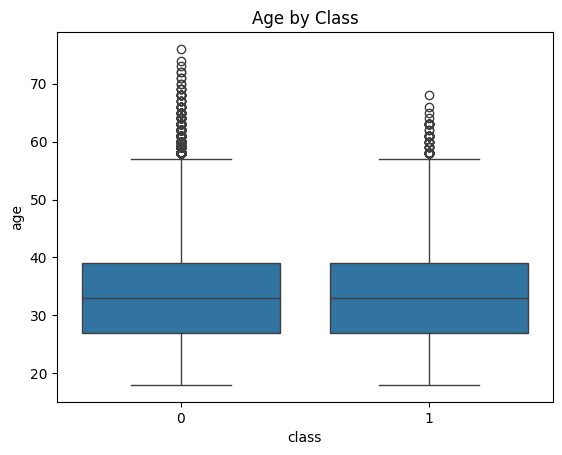

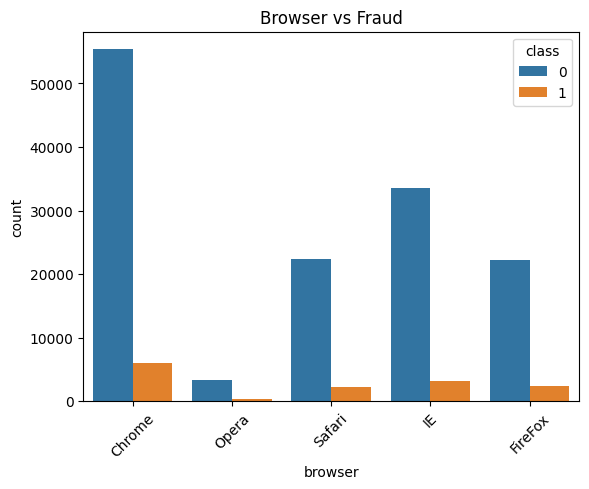

In [24]:
#Bivariate analysis

#Purchase Value vs Class
sns.boxplot(data=fraud_df, x='class', y='purchase_value')
plt.title('Purchase Value by class')
plt.show()

# Age vs Class
sns.boxplot(data=fraud_df, x='class', y='age')
plt.title('Age by Class')
plt.show()

# Browser vs Class
sns.countplot(data=fraud_df, x='browser', hue='class')
plt.xticks(rotation=45)
plt.title('Browser vs Fraud')
plt.show()

In [41]:
# step 4: Merge fraud_df with ip_df

#check data types of ip_address
print(fraud_df['ip_address'].head(10))
print(fraud_df['ip_address'].dtype)

0     732758368.79972
1    350311387.865908
2    2621473820.11095
3    3840542443.91396
4    415583117.452712
5    2809315199.92675
6    3987484328.51882
7    1692458727.64945
8    3719094257.18731
9    341674739.579911
Name: ip_address, dtype: object
object


In [42]:
# Convert ip_address to integer (remove decimals)
fraud_df['ip_int'] = fraud_df['ip_address'].astype(float).astype(int)
print(fraud_df[['ip_address', 'ip_int']].head(10))

         ip_address      ip_int
0   732758368.79972   732758368
1  350311387.865908   350311387
2  2621473820.11095  2621473820
3  3840542443.91396  3840542443
4  415583117.452712   415583117
5  2809315199.92675  2809315199
6  3987484328.51882  3987484328
7  1692458727.64945  1692458727
8  3719094257.18731  3719094257
9  341674739.579911   341674739


In [43]:
# Convert ip_df ranges to integer if needed
import ipaddress
if ip_df['lower_bound_ip_address'].dtype == 'O':
    ip_df['lower_bound_ip_address'] = ip_df['lower_bound_ip_address'].apply(lambda x: int(ipaddress.IPv4Address(x)))
    ip_df['upper_bound_ip_address'] = ip_df['upper_bound_ip_address'].apply(lambda x: int(ipaddress.IPv4Address(x)))

print(ip_df[['lower_bound_ip_address', 'upper_bound_ip_address']].head())


   lower_bound_ip_address  upper_bound_ip_address
0              16777216.0                16777471
1              16777472.0                16777727
2              16777728.0                16778239
3              16778240.0                16779263
4              16779264.0                16781311


In [46]:
#Merge with Country
def map_country(ip):
    row = ip_df[(ip_df['lower_bound_ip_address'] <= ip) & (ip_df['upper_bound_ip_address'] >= ip)]
    if not row.empty:
        return row.iloc[0]['country']
    return 'Unknown'

fraud_df['country'] = fraud_df['ip_int'].apply(map_country)

In [45]:
# Check if merge is done
print(fraud_df[['ip_address', 'ip_int', 'country']].tail())
print(fraud_df['country'].value_counts())

              ip_address      ip_int        country
151107  3451154526.62433  3451154526  United States
151108  2439047221.24922  2439047221    Netherlands
151109  2748470523.70511  2748470523          Japan
151110  3601174708.16967  3601174708  United States
151111  4103824510.60003  4103824510        Unknown
country
United States     58049
Unknown           21966
China             12038
Japan              7306
United Kingdom     4490
                  ...  
Yemen                 1
San Marino            1
Burundi               1
Nauru                 1
Guadeloupe            1
Name: count, Length: 182, dtype: int64


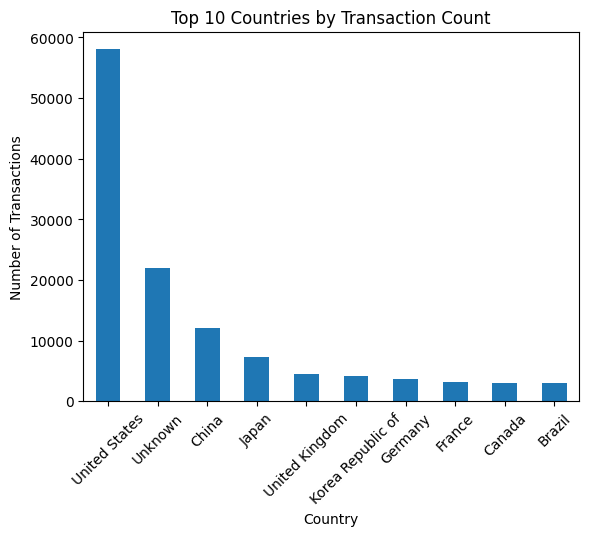

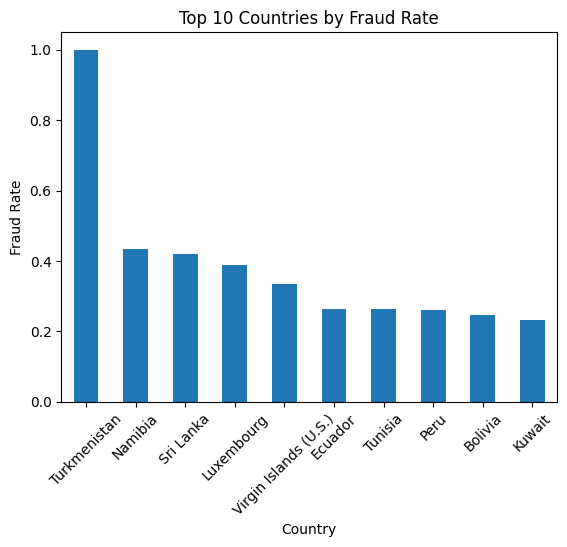

In [47]:
# Top countries by transaction count
fraud_df['country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Countries by Transaction Count')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

# Fraud rate by country
fraud_rate_by_country = fraud_df.groupby('country')['class'].mean().sort_values(ascending=False)
fraud_rate_by_country.head(10).plot(kind='bar')
plt.title('Top 10 Countries by Fraud Rate')
plt.xlabel('Country')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.show()

In [49]:
#step 5: Feature engineering

# Transaction frequency: number of transactions per user
fraud_df['user_transaction_count'] = fraud_df.groupby('user_id')['user_id'].transform('count')

# Transaction velocity: number of transactions per user per day
fraud_df['transaction_day'] = fraud_df['purchase_time'].dt.date
fraud_df['user_daily_transactions'] = fraud_df.groupby(['user_id', 'transaction_day'])['user_id'].transform('count')

# Time-based features (already done, but here for completeness)
fraud_df['hour_of_day'] = fraud_df['purchase_time'].dt.hour
fraud_df['day_of_week'] = fraud_df['purchase_time'].dt.dayofweek
fraud_df['time_since_signup'] = (fraud_df['purchase_time'] - fraud_df['signup_time']).dt.total_seconds()

# Drop helper column if not needed
fraud_df.drop('transaction_day', axis=1, inplace=True)

In [53]:
#step 6: Data transformation

#handle class imbalance

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target
X = fraud_df.drop(['class'], axis=1)
y = fraud_df['class']
# Select only numeric columns for SMOTE
numeric_cols = X.select_dtypes(include=[np.number]).columns
X_numeric = X[numeric_cols]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())

Before SMOTE: class
0    109568
1     11321
Name: count, dtype: int64
After SMOTE: class
0    109568
1    109568
Name: count, dtype: int64


In [54]:
# normalizationa and scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [57]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['browser', 'country']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Get categorical columns from the original data
X_train_cat = encoder.fit_transform(X.loc[X_train.index, categorical_cols])
X_test_cat = encoder.transform(X.loc[X_test.index, categorical_cols])